### 1.1 Import Required Libraries

In [2]:
for (i in c('SnowballC','slam','tm','Matrix','tidytext','dplyr','hunspell','purrr','wordcloud','RWeka','ggplot2','rtweet','httr','jsonlite')){
  if (!require(i, character.only=TRUE)) install.packages(i, repos = "http://cran.us.r-project.org")
  require(i, character.only=TRUE)
}



# load twitter library - the rtweet library is recommended now over twitteR
library('rjson')
library('jsonlite')


# animated maps
# to install: devtools::install_github("dgrtwo/gganimate")
# note this required imagemagick to be installed
library('leaflet')
library('gganimate')
library('lubridate')
library('maps')
library('ggthemes')

options(stringsAsFactors = FALSE)

Loading required package: SnowballC



Loading required package: slam



Loading required package: tm



Loading required package: NLP



Loading required package: Matrix



Loading required package: tidytext



Loading required package: dplyr




Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Loading required package: hunspell



Loading required package: purrr



Loading required package: wordcloud



Loading required package: RColorBrewer



Loading required package: RWeka



Loading required package: ggplot2




Attaching package: ‘ggplot2’




The following object is masked from ‘package:NLP’:

    annotate




Loading required package: rtweet




Attaching package: ‘rtweet’




The following object is masked from ‘package:purrr’:

    flatten




Loading required package: httr




Attaching package: ‘httr’




The following object is masked from ‘package:NLP’:

    content




Loading required package: jsonlite




Attaching package: ‘jsonlite’




The following object is masked from ‘package:rtweet’:

    flatten




The following object is masked from ‘package:purrr’:

    flatten





Attaching package: ‘rjson’




The following objects are masked from ‘package:jsonlite’:

    fromJSON, toJSON





Attaching package: ‘lubridate’




The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union





Attaching package: ‘maps’




The following object is masked from ‘package:purrr’:

    map




1.2 Setting Up Authentification

In [3]:
appname = 'YangSMA'
consumer_key <- 'dLXDupjaZaKwUR5JGfb0Y73qj'
consumer_secret <- 'WLhsNi8mu4sjC2WJZ1r4YhxuIzfj5vfKCFz2eEVx2n6bHkEPfF'
access_token <- '1351563423117545472-kooWXzkZRKXexVfZ2Fg0dOO6pZcROp'
access_secret <- 'NTyMsPZeA8prPygpIEMMsxVlTo6KmDJL6GYNfUMa8UlSk'
bearer_key <- 'AAAAAAAAAAAAAAAAAAAAAPdpMAEAAAAATNLCqrqCEe4OjPFk%2FYZF7J9BtS4%3DeNL2ATx7rigSUTTB24TslsejThm8NzUr56sr5VZ6BbB9g7GXub'



twitter_token <- create_token(
  app = appname,
  consumer_key = consumer_key,
  consumer_secret = consumer_secret,
  access_token = access_token,
  access_secret = access_secret,
  set_renv=FALSE)

Read data

In [4]:
spotify_tweets <- get_timeline('spotify', n = 3200, parse = TRUE, language = 'en', token = twitter_token)

In [5]:
head(spotify_tweets,1)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<dttm>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
17230018,1357360188085436416,2021-02-04 16:07:42,Spotify,@bitty_boop 💚https://t.co/5aDJrZfz54 https://t.co/jJZ9yXBJ2d,Lithium Tech.,24,1357339927474671623,20093357,bitty_boop,⋯,34445,12235,2008-11-07 12:14:28,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg


In [6]:
save(spotify_tweets,file="spotify_tweets.Rdata")

In [7]:
spotify_today <- search_tweets("spotify", n=18000, include_rts=TRUE, lang="en", retryonratelimit=TRUE, timeout = 300,token=twitter_token)

spotify_today 

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<dttm>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
1347589641289957376,1357365228560764930,2021-02-04 16:27:43,mushieHQ,i ought to complain to Spotify for not being named this week’s hottest single🙄🙄🙄,Twitter Web App,80,NA,NA,NA,⋯,4942,12775,2021-01-08 17:03:09,FALSE,https://t.co/Gy7GmWJffH,https://pronouny.xyz/u/mushiehq,NA,https://pbs.twimg.com/profile_banners/1347589641289957376/1612105285,NA,http://pbs.twimg.com/profile_images/1355893953644560386/AqGxsNTj_normal.jpg
168061664,1357365226530893824,2021-02-04 16:27:43,Alirzaeyi,Nightmoves by Michael Franks https://t.co/IDtzkVmD8x #NowPlaying,Twitter Web App,64,NA,NA,NA,⋯,14656,73766,2010-07-18 08:04:21,FALSE,https://t.co/QXP2bkbud9,https://open.spotify.com/user/11181038521?si=HBpH8FUYReWcUW5FeZsM4w,NA,https://pbs.twimg.com/profile_banners/168061664/1607319521,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1335820619141746689/TnO4-S-Y_normal.jpg
1255514772742844424,1357365224311955457,2021-02-04 16:27:42,Wanjaimewgulf4,Good day 🌻🌞 @MSuppasit https://t.co/0lUcQcLBoX,Twitter for Android,65,NA,NA,NA,⋯,11282,1952,2020-04-29 15:10:44,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/1255514772742844424/1609274454,NA,http://pbs.twimg.com/profile_images/1357049038651068419/3qj1iMus_normal.jpg
1025736696049094657,1357365222156226560,2021-02-04 16:27:42,chsnole,"Sam and Caleb ""tackle"" a few of the transfer portal impacts and start their NFL Draft positional preview with the Quarterbacks. Anchor:https://t.co/0u6EqRTrCi Apple:https://t.co/95uBo3E3WQ Google::https://t.co/qtGHGrHNbm Spotify:https://t.co/k7imlBAHPB",Twitter Web App,140,NA,NA,NA,⋯,6713,41697,2018-08-04 13:34:20,FALSE,https://t.co/lMSZ6qwfIe,https://podcasts.apple.com/us/podcast/tribeoholics/id1523414384,NA,https://pbs.twimg.com/profile_banners/1025736696049094657/1603031266,NA,http://pbs.twimg.com/profile_images/1317126784844967938/hO5_r0aV_normal.jpg
1025736696049094657,1357359177195208709,2021-02-04 16:03:41,chsnole,🍻 If you missed our latest episode check out the replay below 👇🏼 or if you’d rather listen to the pod check us out on @Spotify &amp; @ApplePodcasts as well as any other 🎙 platform! #Noles #FSU 🍢🍢 Spotify: https://t.co/simZpnc16e Apple: https://t.co/AQsNfKDsqQ https://t.co/DM14YkrOES,Twitter for iPhone,261,NA,NA,NA,⋯,6713,41697,2018-08-04 13:34:20,FALSE,https://t.co/lMSZ6qwfIe,https://podcasts.apple.com/us/podcast/tribeoholics/id1523414384,NA,https://pbs.twimg.com/profile_banners/1025736696049094657/1603031266,NA,http://pbs.twimg.com/profile_images/1317126784844967938/hO5_r0aV_normal.jpg
1349069764568764417,1357365220109389825,2021-02-04 16:27:41,Anthony71448630,Here’s a song for you… The Taste of Ink by The Used https://t.co/CLE938Y3e0,Twitter for Android,75,NA,NA,NA,⋯,86,5,2021-01-12 19:04:42,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/1349069764568764417/1612215114,NA,http://pbs.twimg.com/profile_images/1349069895863070720/1FpKYk0__normal.jpg
1349069764568764417,1357362647440719872,2021-02-04 16:17:28,Anthony71448630,Here’s a song for you… 5 Minutes Alone by Pantera https://t.co/uRcFuC4Q6x,Twitter for Android,73,NA,NA,NA,⋯,86,5,2021-01-12 19:04:42,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/1349069764568764417/1612215114,NA,http://pbs.twimg.com/profile_images/1349069895863070720/1FpKYk0__normal.jpg
1349069764568764417,1357364477210091520,2021-02-04 16:24:44,Anthony71448630,Here’s a song for you… Freak On a Leash by Korn https://t.co/32PLbLyfhk,Twitter for Android,71,NA,NA,NA,⋯,86,5,2021-01-12 19:04:42,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/1349069764568764417/1612215114,NA

In [8]:
save(spotify_today,file="spotify_today.Rdata")

In [9]:
count(unique(spotify_today[!is.na(spotify_today$country),'country']))
unique(spotify_today[!is.na(spotify_today$country),'country'])
country_factor <- as.factor(spotify_today$country)
#summary <- country_factor %>% 
#            group_by(country) %>% 
#            summarize(summary_count = count(country))

n
<int>
19


country
<chr>
United States
Republic of the Philippines
Chile
United Kingdom
Malaysia
India
The Netherlands
Indonesia
Mexico


2.1 Preprocess the Data

In [10]:
library(tidytext)
library(dplyr)

#  Remove punctuation and numbers with regular expressions
spotify_today <- mutate(spotify_today, message = gsub(x = text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))

#  Tokenization (+ going to lowercase)
spotify_today <- spotify_today %>% unnest_tokens(output = "word",
                                                  input = message,
                                                  token = "words", 
                                                  drop=FALSE,to_lower=TRUE) 

nrow(spotify_today)

# Load list of stop words - from the tidytext package
data("stop_words")
# Remove stop words from your list of words
spotify_today <- spotify_today %>%
  anti_join(stop_words)

[1] 341569

Joining, by = "word"



In [11]:
# Remove retweets
Spotify_tweets_organic <- spotify_today[spotify_today$is_retweet==FALSE, ] 

# Remove replies
Spotify_tweets_organic <- subset(Spotify_tweets_organic, is.na(Spotify_tweets_organic$reply_to_status_id)) 

Spotify_tweets_organic <- Spotify_tweets_organic %>% arrange(-favorite_count)
Spotify_tweets_organic[1,5]
Spotify_tweets_organic <- Spotify_tweets_organic %>% arrange(-retweet_count)
Spotify_tweets_organic[1,5]

# Keeping only the retweets
Spotify_retweets <- spotify_today[spotify_today$is_retweet==TRUE,]
# Keeping only the replies
Spotify_replies <- subset(spotify_today, !is.na(spotify_today$reply_to_status_id))

# Creating a data frame
data <- data.frame(
  category=c("Organic", "Retweets", "Replies"),
  count=c(2856, 192, 120)
)

text
<chr>
".@TXT_members ""minisode1: Blue Hour"" has surpassed 60 MILLION streams on Spotify. https://t.co/1m3W2N6mo9"


text
<chr>
".@TXT_members ""minisode1: Blue Hour"" has surpassed 60 MILLION streams on Spotify. https://t.co/1m3W2N6mo9"


In [12]:
save(spotify_today,file="spotify_today.Rdata")

In [13]:
# Create a table of users and tweet counts for the topic
spotify_name <- table(spotify_today$screen_name)

# Sort the table in descending order of tweet counts
spotify_name_sort <- sort(spotify_name, decreasing = TRUE)

# View sorted table for top 10 users
head(spotify_name_sort, 10)


   FTLOLpodcast     MunitasPlex       belisapie MarionFiedlerTN  lm_kd_daughter 
           1168             742             738             736             728 
    _ArtistRack       ephemeual      nautflixco         Elsaaei       faieytale 
            665             645             583             468             464 

In [14]:
SpotifySentiment <- inner_join(spotify_today,get_sentiments("bing"))

head(SpotifySentiment)
nrow(SpotifySentiment)

Joining, by = "word"



user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,message,word,sentiment
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1347589641289957376,1357365228560764930,2021-02-04 16:27:43,mushieHQ,i ought to complain to Spotify for not being named this week’s hottest single🙄🙄🙄,Twitter Web App,80,NA,NA,NA,⋯,FALSE,https://t.co/Gy7GmWJffH,https://pronouny.xyz/u/mushiehq,NA,https://pbs.twimg.com/profile_banners/1347589641289957376/1612105285,NA,http://pbs.twimg.com/profile_images/1355893953644560386/AqGxsNTj_normal.jpg,i ought to complain to Spotify for not being named this weeks hottest single,complain,negative
1347589641289957376,1357365228560764930,2021-02-04 16:27:43,mushieHQ,i ought to complain to Spotify for not being named this week’s hottest single🙄🙄🙄,Twitter Web App,80,NA,NA,NA,⋯,FALSE,https://t.co/Gy7GmWJffH,https://pronouny.xyz/u/mushiehq,NA,https://pbs.twimg.com/profile_banners/1347589641289957376/1612105285,NA,http://pbs.twimg.com/profile_images/1355893953644560386/AqGxsNTj_normal.jpg,i ought to complain to Spotify for not being named this weeks hottest single,hottest,positive
1025736696049094657,1357359177195208709,2021-02-04 16:03:41,chsnole,🍻 If you missed our latest episode check out the replay below 👇🏼 or if you’d rather listen to the pod check us out on @Spotify &amp; @ApplePodcasts as well as any other 🎙 platform! #Noles #FSU 🍢🍢 Spotify: https://t.co/simZpnc16e Apple: https://t.co/AQsNfKDsqQ https://t.co/DM14YkrOES,Twitter for iPhone,261,NA,NA,NA,⋯,FALSE,https://t.co/lMSZ6qwfIe,https://podcasts.apple.com/us/podcast/tribeoholics/id1523414384,NA,https://pbs.twimg.com/profile_banners/1025736696049094657/1603031266,NA,http://pbs.twimg.com/profile_images/1317126784844967938/hO5_r0aV_normal.jpg,If you missed our latest episode check out the replay below or if youd rather listen to the pod check us out on Spotify amp ApplePodcasts as well as any other platform Noles FSU Spotify httpstcosimZpnce Apple httpstcoAQsNfKDsqQ httpstcoDMYkrOES,missed,negative
1349069764568764417,1357364477210091520,2021-02-04 16:24:44,Anthony71448630,Here’s a song for you… Freak On a Leash by Korn https://t.co/32PLbLyfhk,Twitter for Android,71,NA,NA,NA,⋯,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/1349069764568764417/1612215114,NA,http://pbs.twimg.com/profile_images/1349069895863070720/1FpKYk0__normal.jpg,Heres a song for you Freak On a Leash by Korn httpstcoPLbLyfhk,freak,negative
70949834,1357365216720412673,2021-02-04 16:27:40,beatasiewicz,"When Love Comes To Town - U2, B.B. King https://t.co/bosSpsImdo #NowPlaying 💪🏻",Twitter Web App,78,NA,NA,NA,⋯,FALSE,https://t.co/6Q5yF7vn7y,https://www.instagram.com/beata_siewicz_photo/,NA,https://pbs.twimg.com/profile_banners/70949834/1606667603,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/1336690656970936322/BiTRRjTg_normal.jpg,When Love Comes To Town U BB King httpstcobosSpsImdo NowPlaying,love,positive
1132350567664119808,1357365215449411584,2021-02-04 16:27:40,yusmarinaee,Hello. We're aware of the issues on Spotify and we're trying to fix it as soon as possible for you guys.,Twitter for iPhone,123,NA,NA,NA,⋯,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/1132350567664119808/1611620829,NA,http://pbs.twimg.com/profile_images/1352123651286392839/t8_fL3L5_normal.jpg,Hello Were aware of the issues on Spotify and were trying to fix it as soon as possible for you guys,issues,negative


[1] 13430

In [15]:
save(SpotifySentiment,file="SpotifySentiment.Rdata")

Get the most positive/negative words

In [16]:
summarySentiment <- SpotifySentiment %>%  count(word,sentiment,sort=TRUE) %>%
                    group_by(sentiment) %>%
                    top_n(10) %>%  
                    arrange(n) %>%
                    as.data.frame(stringsAsFactors=FALSE)

head(summarySentiment)

Selecting by n



,word,sentiment,n
,<chr>,<chr>,<int>
1,falling,negative,53
2,lost,negative,58
3,fucking,negative,62
4,miss,negative,73
5,hard,negative,74
6,bad,negative,90


In [17]:
save(summarySentiment,file="summarySentiment.Rdata")

In [18]:
summarySentiment %>%
  ungroup() %>%
  mutate(word = reorder(word, n))

word,sentiment,n
<fct>,<chr>,<int>
falling,negative,53
lost,negative,58
fucking,negative,62
miss,negative,73
hard,negative,74
bad,negative,90
sad,negative,94
bugs,negative,96
missed,negative,111


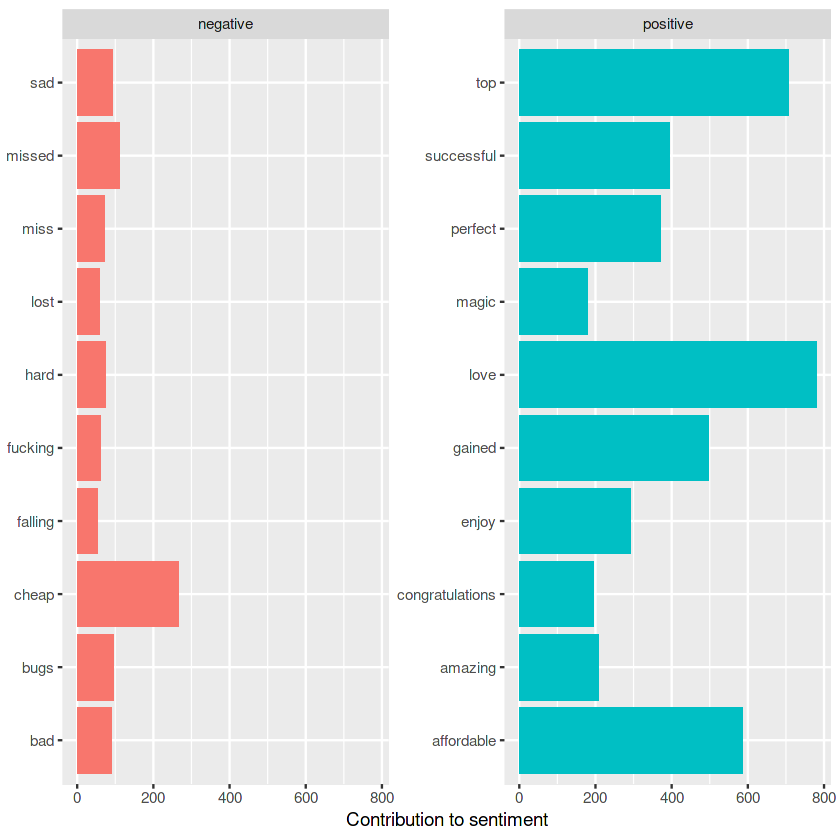

In [19]:
  ggplot(summarySentiment,aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Contribution to sentiment",
       x = NULL) +
  coord_flip()

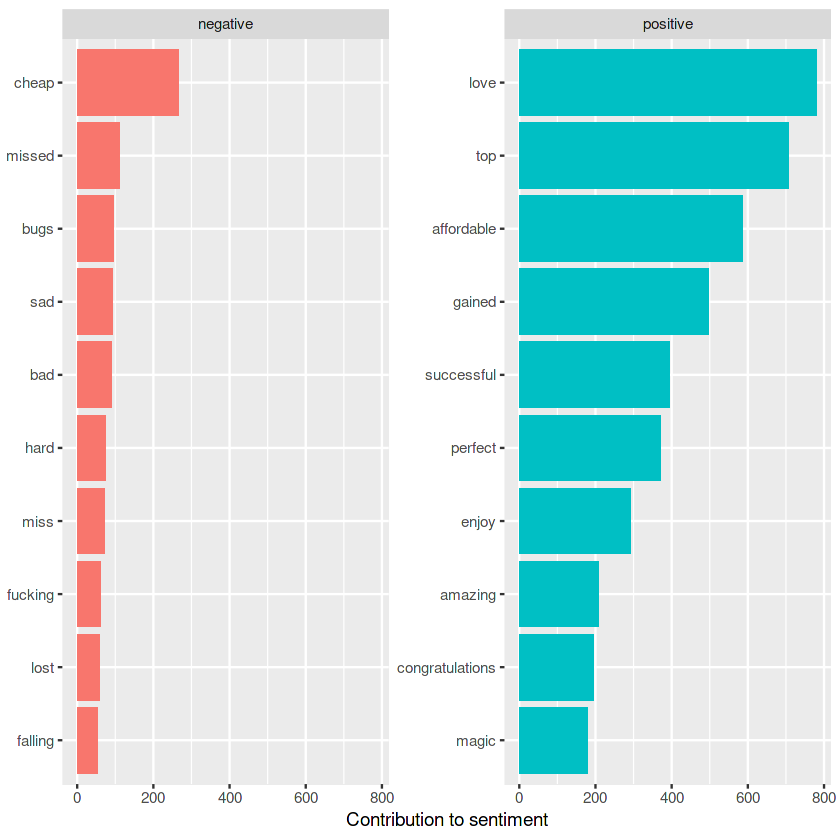

In [20]:
library(ggplot2)
library(dplyr)

summarySentiment %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Contribution to sentiment",
       x = NULL) +
  coord_flip()

Get a summary per post

In [21]:
library(tidyr)

statusSentiment <- SpotifySentiment %>%
                    count(user_id, sentiment) %>%
                    pivot_wider(id_cols = user_id, names_from=sentiment,values_from=n, values_fill = 0) %>%
                    mutate(sentiment = positive - negative)

head(statusSentiment)
nrow(statusSentiment)


Attaching package: ‘tidyr’




The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack




user_id,positive,negative,sentiment
<chr>,<int>,<int>,<int>
1000052457106563072,1,0,1
1000205486786887680,2,0,2
1000207203670863873,2,0,2
1000610078502748160,2,0,2
1000736902025228289,0,1,-1
1000754616009572352,1,0,1


[1] 6862

In [22]:
SentimentAnalysis <- inner_join(spotify_today,statusSentiment)

Joining, by = "user_id"



In [23]:
head(SentimentAnalysis,1)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,message,word,positive,negative,sentiment
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1347589641289957376,1357365228560764930,2021-02-04 16:27:43,mushieHQ,i ought to complain to Spotify for not being named this week’s hottest single🙄🙄🙄,Twitter Web App,80,NA,NA,NA,⋯,https://pronouny.xyz/u/mushiehq,NA,https://pbs.twimg.com/profile_banners/1347589641289957376/1612105285,NA,http://pbs.twimg.com/profile_images/1355893953644560386/AqGxsNTj_normal.jpg,i ought to complain to Spotify for not being named this weeks hottest single,complain,1,1,0


In [30]:
save(statusSentiment,file="statusSentiment.Rdata")

In [31]:
statusSentiment_score<-mean(statusSentiment$sentiment)
paste("Mean sentiment score =",statusSentiment_score)

[1] "Mean sentiment score = 0.920431361119207"

Negative Detection

In [32]:
Negative_Detection <- spotify_today %>% group_by(user_id) %>% 
                            mutate(prevword = lag(x=word,n=1)) %>% 
                            ungroup()

In [33]:
negationWords <- get_stopwords()[c(81:98,165:167),"word"]
negationWords

word
<chr>
isn't
aren't
wasn't
weren't
hasn't
haven't
hadn't
doesn't
don't


In [34]:
library(tidyr)
Negative_DetectionSentiment <- Negative_Detection %>% inner_join(get_sentiments("bing")) %>%
  mutate(correct_sentiment = ifelse(prevword %in% negationWords$word,ifelse(sentiment == "Positive","Negative","Positive"),sentiment)) %>%
                    count(user_id, correct_sentiment) %>%
                    pivot_wider(id_cols = user_id, names_from=correct_sentiment,values_from=n, values_fill = 0) %>%
                    mutate(sentiment = positive - negative)

mean(Negative_DetectionSentiment$sentiment)

Joining, by = "word"



[1] 0.9204314

Spotify tweets organic analysis

In [35]:
SpotifyOrganicSentiment <- inner_join(Spotify_tweets_organic,get_sentiments("bing"))

head(SpotifyOrganicSentiment)
nrow(SpotifyOrganicSentiment)

Joining, by = "word"



user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,message,word,sentiment
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4098037519,1357347487351144452,2021-02-04 15:17:13,GFSquadSubs,"[INFO] After the final episode of #TrueBeauty, ""I'm In The Mood For Dancing"" gained 2.6M streams in Spotify &amp; 4.2M views in Youtube. It's the Most Streamed OST of the drama since released. This is now her Most Streamed Solo Track &amp; her Most Successful Track Internationally. https://t.co/JJyQWP0CUs",Twitter for Android,282,NA,NA,NA,⋯,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/4098037519/1610722870,http://abs.twimg.com/images/themes/theme11/bg.gif,http://pbs.twimg.com/profile_images/1287020241197776901/2CNoqcgB_normal.jpg,INFO After the final episode of TrueBeauty Im In The Mood For Dancing gained M streams in Spotify amp M views in Youtube Its the Most Streamed OST of the drama since released This is now her Most Streamed Solo Track amp her Most Successful Track Internationally httpstcoJJyQWPCUs,gained,positive
4098037519,1357347487351144452,2021-02-04 15:17:13,GFSquadSubs,"[INFO] After the final episode of #TrueBeauty, ""I'm In The Mood For Dancing"" gained 2.6M streams in Spotify &amp; 4.2M views in Youtube. It's the Most Streamed OST of the drama since released. This is now her Most Streamed Solo Track &amp; her Most Successful Track Internationally. https://t.co/JJyQWP0CUs",Twitter for Android,282,NA,NA,NA,⋯,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/4098037519/1610722870,http://abs.twimg.com/images/themes/theme11/bg.gif,http://pbs.twimg.com/profile_images/1287020241197776901/2CNoqcgB_normal.jpg,INFO After the final episode of TrueBeauty Im In The Mood For Dancing gained M streams in Spotify amp M views in Youtube Its the Most Streamed OST of the drama since released This is now her Most Streamed Solo Track amp her Most Successful Track Internationally httpstcoJJyQWPCUs,successful,positive
1238586016254038020,1357351563879198730,2021-02-04 15:33:25,theylovemoon,WAIT EVERYONE SHUTUP SPOTIFY IS GIVING US PREMIUM FOR TWO MONTHS THIS IS PERFECT FOR ATEEZ COMEBACK USE THIS OPPORTUNITY. https://t.co/x94Dwm4JDH,Twitter for iPhone,121,NA,NA,NA,⋯,FALSE,https://t.co/nathxg8Dly,https://youtu.be/_hFarg-Obuc,NA,https://pbs.twimg.com/profile_banners/1238586016254038020/1611948140,NA,http://pbs.twimg.com/profile_images/1355234283762425858/5NhoGWbr_normal.jpg,WAIT EVERYONE SHUTUP SPOTIFY IS GIVING US PREMIUM FOR TWO MONTHS THIS IS PERFECT FOR ATEEZ COMEBACK USE THIS OPPORTUNITY httpstcoxDwmJDH,perfect,positive
1084494155403968512,1357359666653716483,2021-02-04 16:05:37,TXTChartData,.@TXT_members fastest albums to reach 60M on Spotify: #1 The Dream Chapter: STAR — 94 days #2 minisode1: Blue Hour — 101 days (NEW) #3 The Dream Chapter: MAGIC — 122 days #4 The Dream Chapter: ETERNITY — 134 days https://t.co/8cxG2MCdw5,Twitter Web App,213,NA,NA,NA,⋯,FALSE,https://t.co/2kKfsBHjLT,https://biglink.to/BlueHourParty,NA,https://pbs.twimg.com/profile_banners/1084494155403968512/1610417729,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1348834192818372609/K2XVJsVu_normal.jpg,TXTmembers fastest albums to reach M on Spotify The Dream Chapter STAR days minisode Blue Hour days The Dream Chapter MAGIC days The Dream Chapter ETERNITY days httpstcocxGMCdw,fastest,positive
1084494155403968512,1357359666653716483,2021-02-04 16:05:37,TXTChartData,.@TXT_members fastest albums to reach 60M on Spotify: #1 The Dream Chapter: STAR — 94 days #2 minisode1: Blue Hour — 101 days (NEW) #3 The Dream Chapter: MAGIC — 122 days #4 The Dream Chapter: ETERNITY — 134 days https://t.co/8cxG2MCdw5,Twitter Web App,213,NA,NA,NA,⋯,FALSE,https://t.co/2kKfsBHjLT,https://b

[1] 3160

In [36]:
save(SpotifyOrganicSentiment,file="SpotifyOrganicSentiment.Rdata")

In [37]:
summaryOrganicSentiment <- SpotifyOrganicSentiment %>%  count(word,sentiment,sort=TRUE) %>%
                    group_by(sentiment) %>%
                    top_n(10) %>%  
                    arrange(n) %>%
                    as.data.frame(stringsAsFactors=FALSE)

head(summaryOrganicSentiment)

Selecting by n



,word,sentiment,n
,<chr>,<chr>,<int>
1,damn,negative,23
2,perfect,positive,24
3,fuck,negative,25
4,amazing,positive,27
5,free,positive,27
6,hate,negative,28


In [38]:
summaryOrganicSentiment %>%
  ungroup() %>%
  mutate(word = reorder(word, n))
save(summaryOrganicSentiment,file="summaryOrganicSentiment.Rdata")

word,sentiment,n
<fct>,<chr>,<int>
damn,negative,23
perfect,positive,24
fuck,negative,25
amazing,positive,27
free,positive,27
hate,negative,28
ready,positive,28
bad,negative,29
sad,negative,29


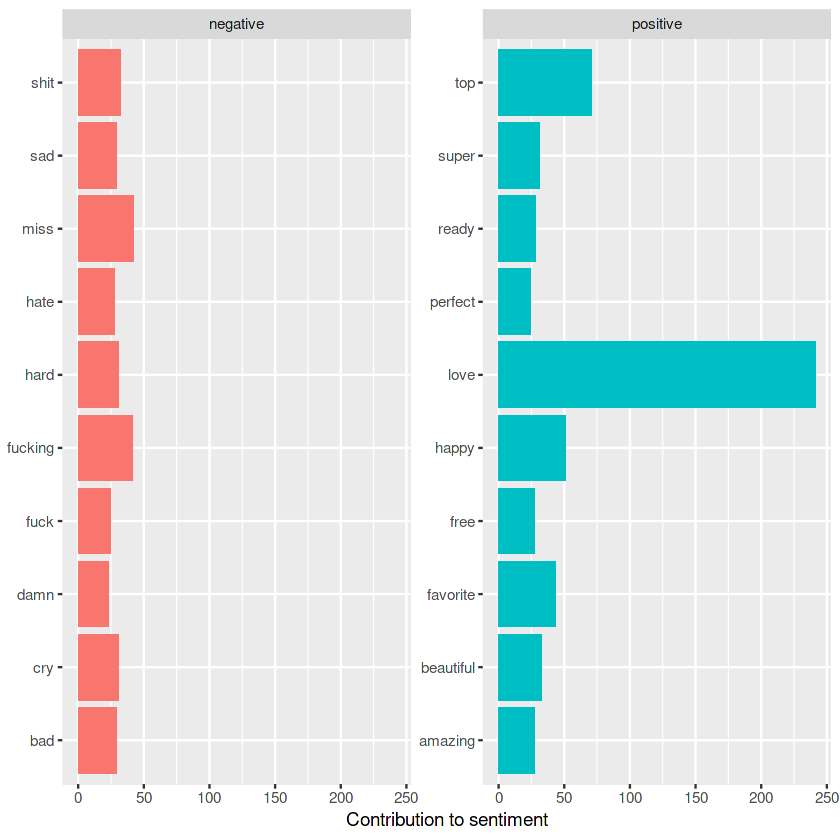

In [39]:
  ggplot(summaryOrganicSentiment,aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Contribution to sentiment",
       x = NULL) +
  coord_flip()

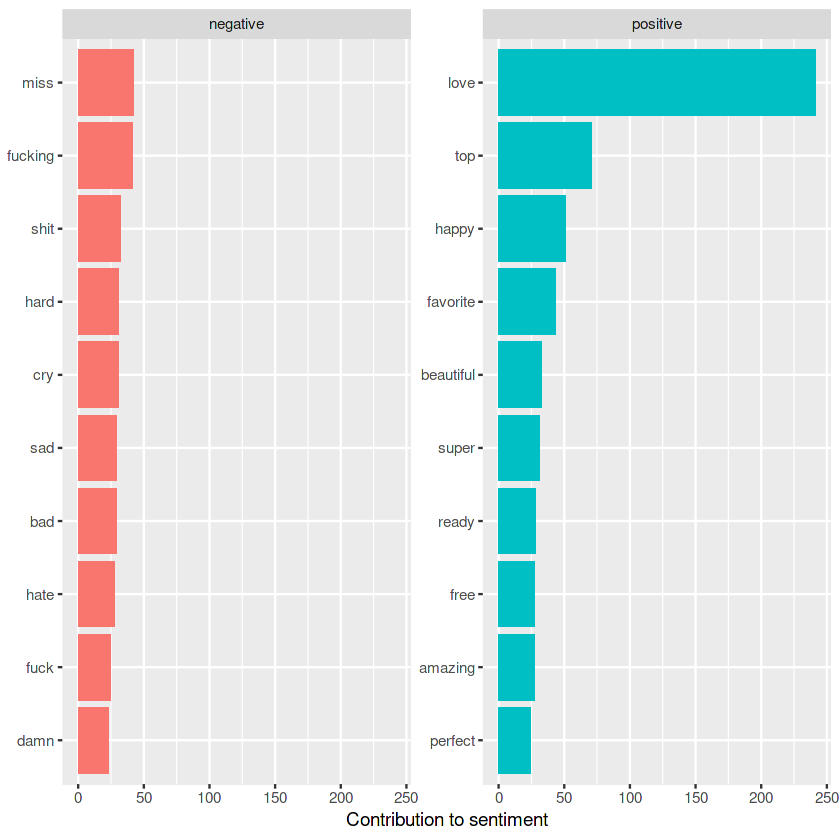

In [40]:
summaryOrganicSentiment %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Contribution to sentiment",
       x = NULL) +
  coord_flip()

In [41]:
library(tidyr)

statusOrganicSentiment <- SpotifyOrganicSentiment %>%
                    count(user_id, sentiment) %>%
                    pivot_wider(id_cols = user_id, names_from=sentiment,values_from=n, values_fill = 0) %>%
                    mutate(sentiment = positive - negative)

head(statusOrganicSentiment)
nrow(statusOrganicSentiment)

user_id,negative,positive,sentiment
<chr>,<int>,<int>,<int>
1000736902025228289,1,0,-1
1001291048830808065,1,0,-1
1001526072381325312,1,1,0
1002767070826659840,2,1,-1
1002901566813175809,0,1,1
1003090866075066369,1,0,-1


[1] 1989

In [42]:
save(statusOrganicSentiment,file="statusOrganicSentiment.Rdata")

In [43]:

statusOrganicSentiment_score<-mean(statusOrganicSentiment$sentiment)
paste("Mean sentiment score =",statusOrganicSentiment_score)

[1] "Mean sentiment score = 0.207139265962795"

In [44]:
save(Spotify_retweets,file="Spotify_retweets.Rdata")

Negative Detection

In [45]:
Negative_Detection_organic <- Spotify_tweets_organic %>% group_by(user_id) %>% 
                            mutate(prevword = lag(x=word,n=1)) %>% 
                            ungroup()

In [46]:
library(tidyr)
Negative_Detection_organicSentiment <- Negative_Detection_organic %>% inner_join(get_sentiments("bing")) %>%
  mutate(correct_sentiment = ifelse(prevword %in% negationWords$word,ifelse(sentiment == "Positive","Negative","Positive"),sentiment)) %>%
                    count(user_id, correct_sentiment) %>%
                    pivot_wider(id_cols = user_id, names_from=correct_sentiment,values_from=n, values_fill = 0) %>%
                    mutate(sentiment = positive - negative)

mean(Negative_Detection_organicSentiment$sentiment)

Joining, by = "word"



[1] 0.2071393

Spotify retweets analysis

In [47]:
Spotify_retweetsSentiment <- inner_join(Spotify_retweets,get_sentiments("bing"))

head(Spotify_retweetsSentiment)
nrow(Spotify_retweetsSentiment)

Joining, by = "word"



user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,message,word,sentiment
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1132350567664119808,1357365215449411584,2021-02-04 16:27:40,yusmarinaee,Hello. We're aware of the issues on Spotify and we're trying to fix it as soon as possible for you guys.,Twitter for iPhone,123,NA,NA,NA,⋯,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/1132350567664119808/1611620829,NA,http://pbs.twimg.com/profile_images/1352123651286392839/t8_fL3L5_normal.jpg,Hello Were aware of the issues on Spotify and were trying to fix it as soon as possible for you guys,issues,negative
358050382,1357362012846624770,2021-02-04 16:14:57,shithappens2020,"Y’all wanted performance, now listen to “Baila Conmigo“ on Today's Top Hits! https://t.co/2VCk8m8y6J",Twitter for Android,120,NA,NA,NA,⋯,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/358050382/1611744189,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1355041207332777985/m3mX1pxy_normal.jpg,Yall wanted performance now listen to Baila Conmigo on Todays Top Hits httpstcoVCkmyJ,top,positive
358050382,1357365085883170816,2021-02-04 16:27:09,shithappens2020,Today is the LAST day of the tracking week for hot 100! Make sure to stream as much as you can today! https://t.co/JF0Mu1HQ0e,Twitter for Android,140,NA,NA,NA,⋯,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/358050382/1611744189,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1355041207332777985/m3mX1pxy_normal.jpg,Today is the LAST day of the tracking week for hot Make sure to stream as much as you can today httpstcoJFMuHQe,hot,positive
2480070637,1357365211800346628,2021-02-04 16:27:39,joonpiee,".@BTS_twt have gained over 200,000 new Spotify followers in February so far (3 days) and over 1.6M in 2021.",Twitter for iPhone,122,NA,NA,NA,⋯,FALSE,https://t.co/UR3rSsAtLA,http://getinformed.carrd.co,NA,https://pbs.twimg.com/profile_banners/2480070637/1610922457,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1350932595291398155/UCRHAjj3_normal.jpg,BTStwt have gained over new Spotify followers in February so far and over M in,gained,positive
1265553890621169673,1357365207669108741,2021-02-04 16:27:38,carryonharryy,"XXXTENTACION's ""SAD!"" has now surpassed 1.5 billion streams on Spotify. His most streamed song.",Twitter for iPhone,110,NA,NA,NA,⋯,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/1265553890621169673/1603350751,NA,http://pbs.twimg.com/profile_images/1319174776590602240/97cDGSCe_normal.jpg,XXXTENTACIONs SAD has now surpassed billion streams on Spotify His most streamed song,sad,negative
1237832401100906498,1357365204334559238,2021-02-04 16:27:37,tinycjh,WAIT EVERYONE SHUTUP SPOTIFY IS GIVING US PREMIUM FOR TWO MONTHS THIS IS PERFECT FOR ATEEZ COMEBACK USE THIS OPPORTUNITY. https://t.co/x94Dwm4JDH,Twitter for iPad,140,NA,NA,NA,⋯,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/1237832401100906498/1612315300,NA,http://pbs.twimg.com/profile_images/1356774549921157121/V0fPKeFA_normal.jpg,WAIT EVERYONE SHUTUP SPOTIFY IS GIVING US PREMIUM FOR TWO MONTHS THIS IS PERFECT FOR ATEEZ COMEBACK USE THIS OPPORTUNITY httpstcoxDwmJDH,perfect,positive


[1] 8772

In [48]:
summaryRetweetsSentiment <- Spotify_retweetsSentiment %>%  count(word,sentiment,sort=TRUE) %>%
                    group_by(sentiment) %>%
                    top_n(10) %>%  
                    arrange(n) %>%
                    as.data.frame(stringsAsFactors=FALSE)

head(summaryRetweetsSentiment)

Selecting by n



,word,sentiment,n
,<chr>,<chr>,<int>
1,twist,negative,29
2,split,negative,35
3,hard,negative,37
4,bad,negative,40
5,falling,negative,41
6,lost,negative,42


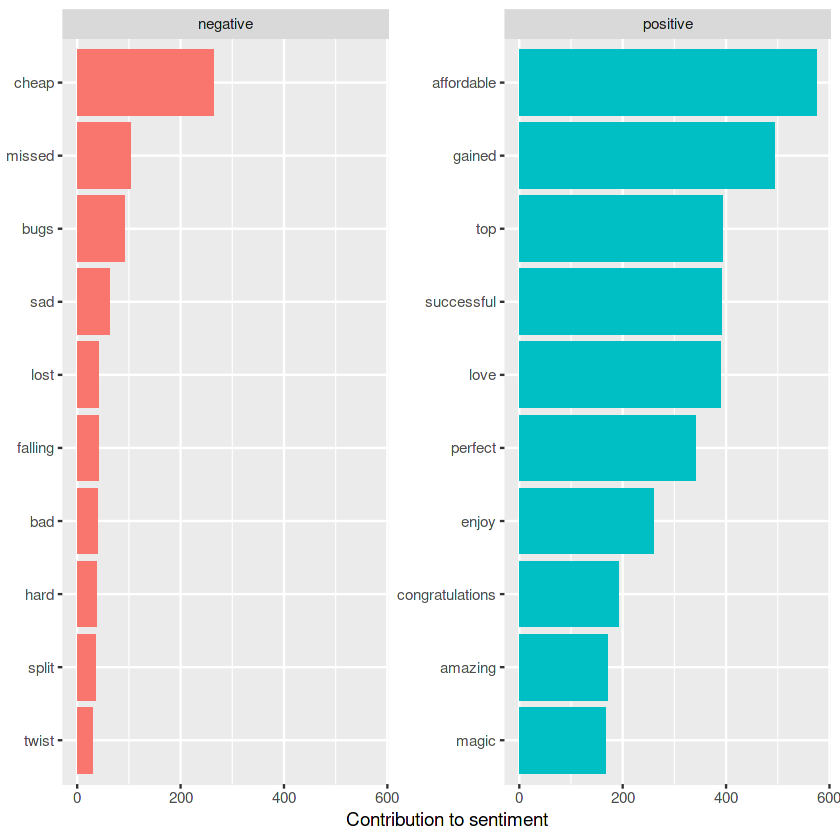

In [49]:
summaryRetweetsSentiment %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Contribution to sentiment",
       x = NULL) +
  coord_flip()

In [50]:
save(summaryRetweetsSentiment,file="summaryRetweetsSentiment.Rdata")

In [51]:
library(tidyr)

statusRetweetsSentiment <- Spotify_retweetsSentiment %>%
                    count(user_id, sentiment) %>%
                    pivot_wider(id_cols = user_id, names_from=sentiment,values_from=n, values_fill = 0) %>%
                    mutate(sentiment = positive - negative)

head(statusRetweetsSentiment)
nrow(statusRetweetsSentiment)

user_id,positive,negative,sentiment
<chr>,<int>,<int>,<int>
1000052457106563072,1,0,1
1000205486786887680,2,0,2
1000207203670863873,2,0,2
1000610078502748160,2,0,2
1000754616009572352,1,0,1
1000955160250613760,3,0,3


[1] 4423

In [52]:
save(statusRetweetsSentiment,file="statusRetweetsSentiment.Rdata")

In [53]:

statusRetweetsSentiment_score<-mean(statusRetweetsSentiment$sentiment)
paste("Mean Retweets sentiment score =",statusRetweetsSentiment_score)

[1] "Mean Retweets sentiment score = 1.17295952973095"

Negative_Detection

In [54]:
Negative_Detection_retweets <- Spotify_retweets %>% group_by(user_id) %>% 
                            mutate(prevword = lag(x=word,n=1)) %>% 
                            ungroup()

In [55]:
library(tidyr)
Negative_Detection_retweetsSentiment <- Negative_Detection_retweets %>% inner_join(get_sentiments("bing")) %>%
  mutate(correct_sentiment = ifelse(prevword %in% negationWords$word,ifelse(sentiment == "Positive","Negative","Positive"),sentiment)) %>%
                    count(user_id, correct_sentiment) %>%
                    pivot_wider(id_cols = user_id, names_from=correct_sentiment,values_from=n, values_fill = 0) %>%
                    mutate(sentiment = positive - negative)

mean(Negative_Detection_retweetsSentiment$sentiment)

Joining, by = "word"



[1] 1.17296

Spotify replies analysis

In [56]:
Spotify_repliesSentiment <- inner_join(Spotify_replies,get_sentiments("bing"))

head(Spotify_repliesSentiment)
nrow(Spotify_repliesSentiment)

Joining, by = "word"



user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,message,word,sentiment
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1696749090,1357365191986401280,2021-02-04 16:27:35,cajndle,Yukkk Open Order dan Ready semua!!! Minat? DM! Testi? Klik pinned🤩 #zonaba #zonauang t.yang jual ned butuh cari mau beli trusted murcee murah spotify netflix youtube canva Disney+ viu iflix wetv 3 tutor apps prem https://t.co/ealnK2Zi6F,Twitter for Android,238,1357317598145220610,1696749090,cajndle,⋯,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/1696749090/1611755847,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1354427729832271872/Wlp560-q_normal.jpg,Yukkk Open Order dan Ready semua Minat DM Testi Klik pinned🤩 zonaba zonauang tyang jual ned butuh cari mau beli trusted murcee murah spotify netflix youtube canva Disney viu iflix wetv tutor apps prem httpstcoealnKZiF,ready,positive
1696749090,1357365191986401280,2021-02-04 16:27:35,cajndle,Yukkk Open Order dan Ready semua!!! Minat? DM! Testi? Klik pinned🤩 #zonaba #zonauang t.yang jual ned butuh cari mau beli trusted murcee murah spotify netflix youtube canva Disney+ viu iflix wetv 3 tutor apps prem https://t.co/ealnK2Zi6F,Twitter for Android,238,1357317598145220610,1696749090,cajndle,⋯,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/1696749090/1611755847,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1354427729832271872/Wlp560-q_normal.jpg,Yukkk Open Order dan Ready semua Minat DM Testi Klik pinned🤩 zonaba zonauang tyang jual ned butuh cari mau beli trusted murcee murah spotify netflix youtube canva Disney viu iflix wetv tutor apps prem httpstcoealnKZiF,trusted,positive
2419368481,1357365174454353920,2021-02-04 16:27:30,fluorescentsoph,@TylerDamara trust me on this one! https://t.co/mUbMuZecrF,Twitter for iPhone,45,1357359157502967809,66199150,TylerDamara,⋯,FALSE,https://t.co/J9FfYfzaBi,http://www.fluorescentsoph.com,NA,https://pbs.twimg.com/profile_banners/2419368481/1612124481,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1345794066194300931/pfNVdM1z_normal.jpg,TylerDamara trust me on this one httpstcomUbMuZecrF,trust,positive
1161813828608413696,1357365172386619393,2021-02-04 16:27:30,yoncewaves,@MrSLeakT guys don’t let them fool you this is the song https://t.co/HmMzbF2m21,Twitter for iPad,69,1357363876241829890,1340043651527942145,MrSLeakT,⋯,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/1161813828608413696/1611267526,NA,http://pbs.twimg.com/profile_images/1357052289878548481/J87sfJTp_normal.jpg,MrSLeakT guys dont let them fool you this is the song httpstcoHmMzbFm,fool,negative
1299653764970840066,1357365137959747588,2021-02-04 16:27:22,sephsnet,"@kierraariel @thereallilkayla Here’s a playlist actually, go blow up my Spotify",Twitter for iPhone,49,1357364924272545793,1299653764970840066,sephsnet,⋯,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/1299653764970840066/1609182879,NA,http://pbs.twimg.com/profile_images/1343736512110866433/fVWWT0TM_normal.jpg,kierraariel thereallilkayla Heres a playlist actually go blow up my Spotify,blow,negative
1125549724348682240,1357365123258544131,2021-02-04 16:27:18,01110110t,https://t.co/TJIozc3XKy don’t listen to the lyrics too hard I’m not fuckin oedipus,Twitter for iPhone,82,1357364928114348032,1125549724348682240,01110110t,⋯,FALSE,https://t.co/sXLdunJ1cm,https://dotherightthing.carrd.co/,NA,https://pbs.twimg.com/profile_banners/1125549724348682240/1594486566,NA,http://pbs.twimg.com/profile_images/1345937951038066689/zkWZQKrI_normal.jpg,httpstcoTJIozcXKy dont listen to the lyrics too hard Im not fuckin oedipus,hard,negative


[1] 1498

In [57]:
save(Spotify_repliesSentiment,file="Spotify_repliesSentiment.Rdata")

In [58]:
summaryRepliesSentiment <- Spotify_repliesSentiment %>%  count(word,sentiment,sort=TRUE) %>%
                    group_by(sentiment) %>%
                    top_n(10) %>%  
                    arrange(n) %>%
                    as.data.frame(stringsAsFactors=FALSE)

head(summaryRepliesSentiment)

Selecting by n



,word,sentiment,n
,<chr>,<chr>,<int>
1,bother,negative,6
2,cry,negative,6
3,hard,negative,6
4,kill,negative,6
5,dark,negative,7
6,fuck,negative,7


In [59]:
save(summaryRepliesSentiment,file="summaryRepliesSentiment.Rdata")

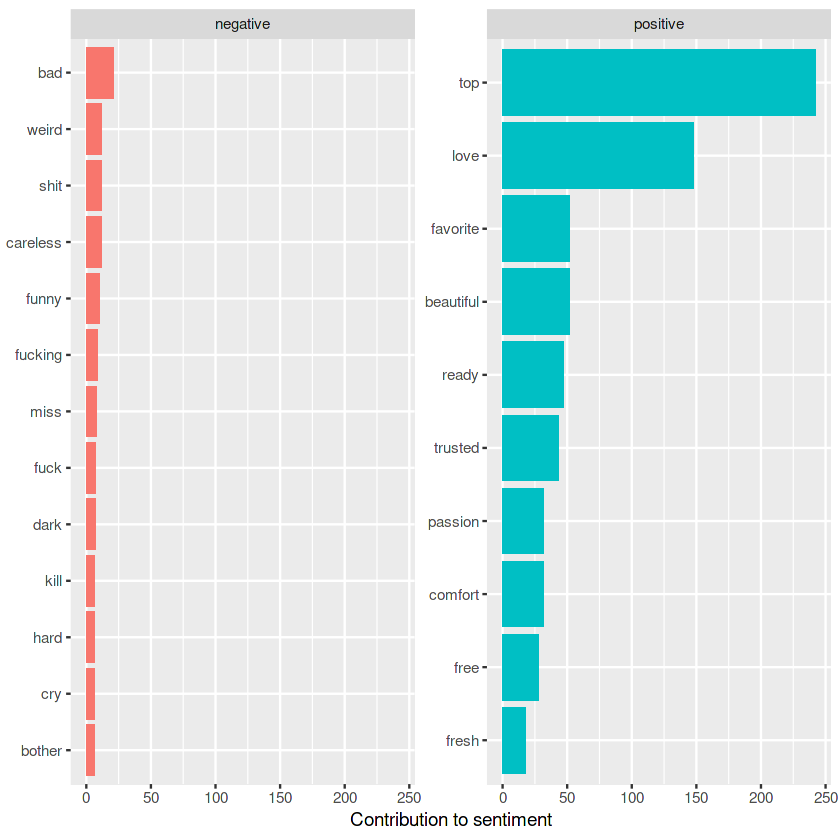

In [60]:
summaryRepliesSentiment %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Contribution to sentiment",
       x = NULL) +
  coord_flip()

In [61]:
library(tidyr)

statusRepliesSentiment <- Spotify_repliesSentiment %>%
                    count(user_id, sentiment) %>%
                    pivot_wider(id_cols = user_id, names_from=sentiment,values_from=n, values_fill = 0) %>%
                    mutate(sentiment = positive - negative)

head(statusRepliesSentiment)
nrow(statusRepliesSentiment)

user_id,negative,positive,sentiment
<chr>,<int>,<int>,<int>
1012467662532665345,1,1,0
1015810440,0,1,1
1021895701058473986,2,0,-2
1022215027,2,0,-2
1022332544,0,1,1
1024363591573561346,0,1,1


[1] 539

In [62]:
save(statusRepliesSentiment,file="statusRepliesSentiment.Rdata")

In [63]:
mean(statusRepliesSentiment$sentiment)
statusRepliesSentiment_score<-mean(statusRepliesSentiment$sentiment)
paste("Mean Retweets sentiment score =",statusRepliesSentiment_score)

[1] 1.328386

[1] "Mean Retweets sentiment score = 1.32838589981447"

Negative_Detection

In [64]:
Negative_Detection_replies <- Spotify_replies %>% group_by(user_id) %>% 
                            mutate(prevword = lag(x=word,n=1)) %>% 
                            ungroup()

In [65]:
library(tidyr)
Negative_Detection_repliesSentiment <- Negative_Detection_replies %>% inner_join(get_sentiments("bing")) %>%
  mutate(correct_sentiment = ifelse(prevword %in% negationWords$word,ifelse(sentiment == "Positive","Negative","Positive"),sentiment)) %>%
                    count(user_id, correct_sentiment) %>%
                    pivot_wider(id_cols = user_id, names_from=correct_sentiment,values_from=n, values_fill = 0) %>%
                    mutate(sentiment = positive - negative)

mean(Negative_Detection_repliesSentiment$sentiment)

Joining, by = "word"



[1] 1.328386


Volume over time (last 3200 posts by the official account, approx. 9 months

In [66]:
working_tweets <- spotify_tweets

In [67]:
#  Remove white spaces, punctuation, numbers, and special characters with regular expressions
working_tweets <- mutate(working_tweets, message = gsub(x = text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))

#  Tokenization (+ going to lowercase)
working_tweets <- working_tweets %>% unnest_tokens(output = 'word',
                                                  input = message,
                                                  token = "words", 
                                                  drop=FALSE,to_lower=TRUE) 

nrow(working_tweets)

# Load list of stop words - from the tidytext package
data("stop_words")

# Remove stop words from your list of words
working_tweets <- working_tweets %>%
  anti_join(stop_words)

nrow(working_tweets)

[1] 32307

Joining, by = "word"



[1] 17309

In [68]:
# Remove retweets
working_tweets_organic <- working_tweets[working_tweets$is_retweet==FALSE, ] 

# Remove replies
working_tweets_organic <- subset(working_tweets_organic, is.na(working_tweets_organic$reply_to_status_id)) 

working_tweets_organic <- working_tweets_organic %>% arrange(-favorite_count)
working_tweets_organic[1,5]
working_tweets_organic <- working_tweets_organic %>% arrange(-retweet_count)
working_tweets_organic[1,5]

# Keeping only the retweets
working_retweets <- working_tweets[working_tweets$is_retweet==TRUE,]
# Keeping only the replies
working_replies <- subset(working_tweets, !is.na(working_tweets$reply_to_status_id))

# Creating a data frame
data2 <- data.frame(
  category=c("Organic", "Retweets", "Replies"),
  count=c(2856, 192, 120)
)

text
<chr>
You hear that #ARMY? #BTS bring the fire on their new single #Dynamite 🧨 Disco with us all weekend long https://t.co/z1g3fMrjN3 #BTS_Dynamite https://t.co/Xg3lqy4p4o


text
<chr>
You hear that #ARMY? #BTS bring the fire on their new single #Dynamite 🧨 Disco with us all weekend long https://t.co/z1g3fMrjN3 #BTS_Dynamite https://t.co/Xg3lqy4p4o


In [69]:
save(working_tweets_organic,file="working_tweets_organic.Rdata")
save(working_retweets,file="working_retweets.Rdata")

In [70]:
# Create a table of users and tweet counts for the topic
working_name <- table(working_tweets$screen_name)

# Sort the table in descending order of tweet counts
working_name_sort <- sort(working_name, decreasing = TRUE)

# View sorted table for top 10 users
head(working_name_sort, 10)

Spotify 
  17309

In [71]:
workingSentiment <- inner_join(working_tweets,get_sentiments("bing"))

head(workingSentiment)
nrow(workingSentiment)

Joining, by = "word"



user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,message,word,sentiment
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
17230018,1357193134069805056,2021-02-04 05:03:53,Spotify,The @foofighters track #ShameShame was about a weird dream #DaveGrohl had... Tell us your weirdest dream 👇,Twitter for iPhone,106,NA,NA,NA,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,The foofighters track ShameShame was about a weird dream DaveGrohl had Tell us your weirdest dream,weird,negative
17230018,1357013658111381509,2021-02-03 17:10:42,Spotify,We’re feelin #Sensitive exploring through @serenaisioma’s creative space. Get lost in the #POLLEN playlist with us https://t.co/vnWGFtdAWn https://t.co/KMy1FN4IKI,Twitter for iPhone,138,NA,NA,NA,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,Were feelin Sensitive exploring through serenaisiomas creative space Get lost in the POLLEN playlist with us httpstcovnWGFtdAWn httpstcoKMyFNIKI,sensitive,positive
17230018,1357013658111381509,2021-02-03 17:10:42,Spotify,We’re feelin #Sensitive exploring through @serenaisioma’s creative space. Get lost in the #POLLEN playlist with us https://t.co/vnWGFtdAWn https://t.co/KMy1FN4IKI,Twitter for iPhone,138,NA,NA,NA,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,Were feelin Sensitive exploring through serenaisiomas creative space Get lost in the POLLEN playlist with us httpstcovnWGFtdAWn httpstcoKMyFNIKI,creative,positive
17230018,1357013658111381509,2021-02-03 17:10:42,Spotify,We’re feelin #Sensitive exploring through @serenaisioma’s creative space. Get lost in the #POLLEN playlist with us https://t.co/vnWGFtdAWn https://t.co/KMy1FN4IKI,Twitter for iPhone,138,NA,NA,NA,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,Were feelin Sensitive exploring through serenaisiomas creative space Get lost in the POLLEN playlist with us httpstcovnWGFtdAWn httpstcoKMyFNIKI,lost,negative
17230018,1356999737078140929,2021-02-03 16:15:23,Spotify,Y'all ready for new Baby? We chopped it up with @lilbaby4pf to talk about flooding the streets with new music https://t.co/Z2qghwGkFm,Twitter for iPhone,140,NA,NA,NA,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,Yall ready for new Baby We chopped it up with lilbabypf to talk about flooding the streets with new music httpstcoZqghwGkFm,ready,positive
17230018,1356633996420141064,2021-02-02 16:02:04,Spotify,@REMINISCENTVEER The best gift you can give is one you can enjoy together 😉https://t.co/h7J1iG7Dsq https://t.co/sd8YuqVgm3,Lithium Tech.,81,1356628807839580160,1350110491054542854,REMINISCENTVEER,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,REMINISCENTVEER The best 

[1] 1297

In [72]:
workingOeganicSentiment <- inner_join(working_tweets_organic,get_sentiments("bing"))

head(workingOeganicSentiment)
nrow(workingOeganicSentiment)

Joining, by = "word"



user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,message,word,sentiment
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
17230018,1286077924638986241,2020-07-22 23:17:26,Spotify,"Dear @onedirection, we wanna roll back like pressing rewind. We just can’t lie, these #10YearsOf1D were the best times of our lives. What is your favorite #1D memory? Here’s some of ours https://t.co/oJtjUeRnv0 https://t.co/z0kl5oz2E7",Twitter Web App,211,NA,NA,NA,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,Dear onedirection we wanna roll back like pressing rewind We just cant lie these YearsOfD were the best times of our lives What is your favorite D memory Heres some of ours httpstcooJtjUeRnv httpstcozklozE,lie,negative
17230018,1286077924638986241,2020-07-22 23:17:26,Spotify,"Dear @onedirection, we wanna roll back like pressing rewind. We just can’t lie, these #10YearsOf1D were the best times of our lives. What is your favorite #1D memory? Here’s some of ours https://t.co/oJtjUeRnv0 https://t.co/z0kl5oz2E7",Twitter Web App,211,NA,NA,NA,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,Dear onedirection we wanna roll back like pressing rewind We just cant lie these YearsOfD were the best times of our lives What is your favorite D memory Heres some of ours httpstcooJtjUeRnv httpstcozklozE,favorite,positive
17230018,1309363360937340928,2020-09-25 05:25:26,Spotify,The queens have spoken 👑 #Lisa #Jisoo #Rosé and #Jennie just shared their favorite tracks in preparation for #TheAlbum https://t.co/A0L1HoX3l8 https://t.co/GMJdGz8EaF,Twitter Web App,143,NA,NA,NA,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,The queens have spoken Lisa Jisoo Rosé and Jennie just shared their favorite tracks in preparation for TheAlbum httpstcoALHoXl httpstcoGMJdGzEaF,favorite,positive
17230018,1283181348061155328,2020-07-14 23:27:28,Spotify,"Calling all ARMY, which new track version are you loving most? 💜 @bts_bighit #MapOfTheSoul7TheJourney https://t.co/X4tVyRvvci https://t.co/zfe9oeIWON",Twitter Web App,126,NA,NA,NA,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,Calling all ARMY which new track version are you loving most btsbighit MapOfTheSoulTheJourney httpstcoXtVyRvvci httpstcozfeoeIWON,loving,positive
17230018,1265961011816722437,2020-05-28 11:00:00,Spotify,Something sweet from @ladygaga and @ygofficialblink 🍬🍭 Get a taste of #SourCandy on the #WelcometoChromatica playlist ⬇️ https://t.co/uMh80Ler33,TweetDeck,144,NA,NA,NA,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,Something sweet from ladygaga and ygofficialblink Get a taste of SourCandy on the WelcometoChromatica playlist httpstcouMhLer,sweet,positive
17230018,1348660948312207364,2021-01-11 16:00:01,Spotify,Calling all @Louis_Tomlinson fans... we made it 🚨 Sorry this took so long to fix 👇 https://t.co/c630dqzOx2,Twitter W

[1] 481

In [73]:
workingRetweetSentiment <- inner_join(working_retweets,get_sentiments("bing"))

head(workingRetweetSentiment)
nrow(workingRetweetSentiment)

Joining, by = "word"



user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,message,word,sentiment
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
17230018,1356999737078140929,2021-02-03 16:15:23,Spotify,Y'all ready for new Baby? We chopped it up with @lilbaby4pf to talk about flooding the streets with new music https://t.co/Z2qghwGkFm,Twitter for iPhone,140,NA,NA,NA,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,Yall ready for new Baby We chopped it up with lilbabypf to talk about flooding the streets with new music httpstcoZqghwGkFm,ready,positive
17230018,1356339136198701056,2021-02-01 20:30:24,Spotify,.@Fredo put on heavy for the UK rap scene on his latest album #MoneyCantBuyHappiness 🔥 Here are the Top 10 Global Album Debuts #SpotifyCharts https://t.co/Z2N1WO17XT,Twitter Web App,140,NA,NA,NA,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,Fredo put on heavy for the UK rap scene on his latest album MoneyCantBuyHappiness Here are the Top Global Album Debuts SpotifyCharts httpstcoZNWOXT,top,positive
17230018,1356254674903437320,2021-02-01 14:54:47,Spotify,".@Olivia_Rodrigo's “drivers license” sitting pretty at #1 ✨🚗 (Jan. 22-28, 2021) #SpotifyCharts https://t.co/uc9QmMvreS",Twitter for iPhone,137,NA,NA,NA,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,OliviaRodrigos drivers license sitting pretty at SpotifyCharts httpstcoucQmMvreS,pretty,positive
17230018,1356254624475271170,2021-02-01 14:54:35,Spotify,".@sanbenito so stable 😭 'EL ÚLTIMO TOUR DEL MUNDO' earns the #1 spot for a second consecutive week (Jan. 22-28, 2021) #SpotifyCharts https://t.co/09YLZTlAU3",Twitter for iPhone,139,NA,NA,NA,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,sanbenito so stable EL ÚLTIMO TOUR DEL MUNDO earns the spot for a second consecutive week SpotifyCharts httpstcoYLZTlAU,stable,positive
17230018,1355272677800337410,2021-01-29 21:52:40,Spotify,guys today is crazy !!! eastside has over a billion plays on spotify and i just dropped a new song with marshmello and vance joy !!! so i decided to eat marshmallows out of my award like a true asshole... https://t.co/IfRYqs2CP6,Twitter Web App,139,NA,NA,NA,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,guys today is crazy eastside has over a billion plays on spotify and i just dropped a new song with marshmello and vance joy so i decided to eat marshmallows out of my award like a true asshole httpstcoIfRYqsCP,crazy,negative
17230018,1355272677800337410,2021-01-29 21:52:40,Spotify,guys today is crazy !!! eastside has over a billion plays on spotify and i just dropped a new song with marshmello and vance joy !!! so i decided to eat marshmallows out of my award like a true asshole... https://t.co/IfRYqs2CP6,Twitter Web App,139,NA,NA,NA,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/161228

[1] 254

In [74]:
workingreplySentiment <- inner_join(working_replies,get_sentiments("bing"))

head(workingreplySentiment)
nrow(workingreplySentiment)

Joining, by = "word"



user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,message,word,sentiment
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
17230018,1356633996420141064,2021-02-02 16:02:04,Spotify,@REMINISCENTVEER The best gift you can give is one you can enjoy together 😉https://t.co/h7J1iG7Dsq https://t.co/sd8YuqVgm3,Lithium Tech.,81,1356628807839580160,1350110491054542854,REMINISCENTVEER,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,REMINISCENTVEER The best gift you can give is one you can enjoy together httpstcohJiGDsq httpstcosdYuqVgm,enjoy,positive
17230018,1356626692333264897,2021-02-02 15:33:03,Spotify,"@chloe_mclelland Don't worry, we've got you 😉 https://t.co/iSwUTMbNZl",Lithium Tech.,28,1356614758519218181,923632758,chloe_mclelland,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,chloemclelland Dont worry weve got you httpstcoiSwUTMbNZl,worry,negative
17230018,1356477496909201408,2021-02-02 05:40:12,Spotify,@Ness22500 Our love for them 🤍 https://t.co/Idi2kVXhRM,Twitter Web App,43,1356474274945486849,1284710828734705665,Ness22500,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,Ness Our love for them 🤍 httpstcoIdikVXhRM,love,positive
17230018,1356462947158032384,2021-02-02 04:42:23,Spotify,@illgirl They make our hearts flutter 💚 https://t.co/UynhWUuYVC,Twitter Web App,54,1356460099905220608,63352207,illgirl,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,illgirl They make our hearts flutter httpstcoUynhWUuYVC,flutter,positive
17230018,1356460886093754369,2021-02-02 04:34:11,Spotify,@fromislils Our love for them is electrifying https://t.co/8e0U84NzC2,Twitter Web App,57,1356458471894380546,1279554293603774465,fromislils,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,fromislils Our love for them is electrifying httpstcoeUNzC,love,positive
17230018,1356459420591394817,2021-02-02 04:28:22,Spotify,@mmm4plus @MamamooCharts @RBW_MAMAMOO Talent 👏 https://t.co/a9JeOgZRf1,Twitter Web App,32,1356408245489926145,1103959389944381441,mmm4plus,⋯,TRUE,https://t.co/jqAb654dV6,http://Spotify.com,NA,https://pbs.twimg.com/profile_banners/17230018/1612289938,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1013614110171250688/vrPUCDn2_normal.jpg,mmmplus MamamooCharts RBWMAMAMOO Talent httpstcoaJeOgZRf,talent,positive


[1] 562

In [75]:
summaryWorkingSentiment <- workingSentiment %>%  count(word,sentiment,sort=TRUE) %>%
                    group_by(sentiment) %>%
                    top_n(10) %>%  
                    arrange(-n) %>%
                    as.data.frame(stringsAsFactors=FALSE)

head(summaryWorkingSentiment)

Selecting by n



,word,sentiment,n
,<chr>,<chr>,<int>
1,love,positive,112
2,top,positive,58
3,favorite,positive,56
4,ready,positive,48
5,perfect,positive,34
6,happy,positive,30


In [76]:
summaryWorkingOeganicSentiment <- workingOeganicSentiment %>%  count(word,sentiment,sort=TRUE) %>%
                    group_by(sentiment) %>%
                    top_n(10) %>%  
                    arrange(-n) %>%
                    as.data.frame(stringsAsFactors=FALSE)

head(summaryWorkingOeganicSentiment)

Selecting by n



,word,sentiment,n
,<chr>,<chr>,<int>
1,favorite,positive,28
2,love,positive,22
3,ready,positive,19
4,celebrate,positive,15
5,enhanced,positive,13
6,fans,positive,11


In [77]:
summaryWorkingRetweetSentiment <- workingRetweetSentiment %>%  count(word,sentiment,sort=TRUE) %>%
                    group_by(sentiment) %>%
                    top_n(10) %>%  
                    arrange(-n) %>%
                    as.data.frame(stringsAsFactors=FALSE)

head(summaryWorkingRetweetSentiment)

Selecting by n



,word,sentiment,n
,<chr>,<chr>,<int>
1,top,positive,41
2,favorite,positive,15
3,love,positive,13
4,bad,negative,5
5,enjoy,positive,5
6,free,positive,5


In [78]:
summaryWorkingreplySentiment <- workingreplySentiment %>%  count(word,sentiment,sort=TRUE) %>%
                    group_by(sentiment) %>%
                    top_n(10) %>%  
                    arrange(-n) %>%
                    as.data.frame(stringsAsFactors=FALSE)

head(summaryWorkingreplySentiment)

Selecting by n



,word,sentiment,n
,<chr>,<chr>,<int>
1,love,positive,77
2,perfect,positive,26
3,ready,positive,24
4,happy,positive,21
5,favorite,positive,13
6,wow,positive,12


In [79]:
save(summaryWorkingSentiment,file="summaryWorkingSentiment.Rdata")

In [80]:
save(summaryWorkingOeganicSentiment,file="summaryWorkingOeganicSentiment.Rdata")

In [81]:
save(summaryWorkingRetweetSentiment,file="summaryWorkingRetweetSentiment.Rdata")

In [82]:
save(summaryWorkingreplySentiment,file="summaryWorkingreplySentiment.Rdata")

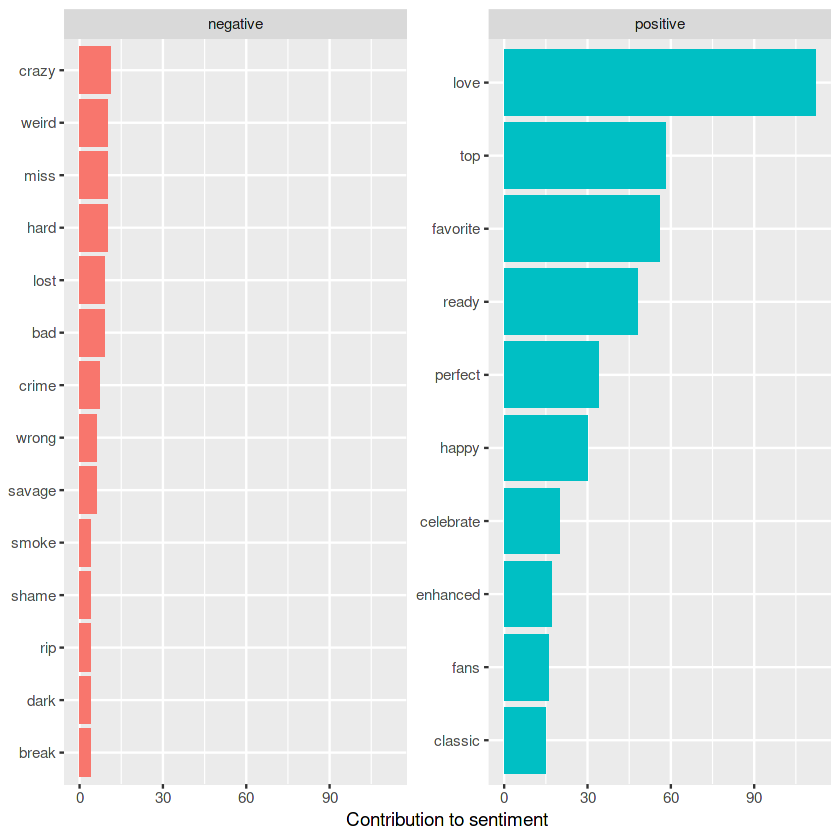

In [83]:
summaryWorkingSentiment %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Contribution to sentiment",
       x = NULL) +
  coord_flip()

In [84]:
statusWorkingSentiment <- workingSentiment %>%
                    count(status_id, sentiment) %>%
                    pivot_wider(id_cols = status_id, names_from=sentiment,values_from=n, values_fill = 0) %>%
                    mutate(sentiment = positive - negative)

head(statusWorkingSentiment)
nrow(statusWorkingSentiment)

status_id,positive,negative,sentiment
<chr>,<int>,<int>,<int>
1253383132612644868,1,0,1
1253388674139435009,2,0,2
1253394563336732673,0,1,-1
1253396020320440321,1,0,1
1253397162697859072,1,0,1
1253426530178355202,2,1,1


[1] 988

In [85]:
statusWorkingOeganicSentiment <- workingOeganicSentiment %>%
                    count(status_id, sentiment) %>%
                    pivot_wider(id_cols = status_id, names_from=sentiment,values_from=n, values_fill = 0) %>%
                    mutate(sentiment = positive - negative)

head(statusWorkingOeganicSentiment)
nrow(statusWorkingOeganicSentiment)

status_id,positive,negative,sentiment
<chr>,<int>,<int>,<int>
1253383132612644868,1,0,1
1253394563336732673,0,1,-1
1253426530178355202,2,1,1
1253534882984128514,1,1,0
1253822968087474176,1,0,1
1254105062655262721,2,0,2


[1] 331

In [86]:
statusWorkingRetweetSentiment <- workingRetweetSentiment %>%
                    count(status_id, sentiment) %>%
                    pivot_wider(id_cols = status_id, names_from=sentiment,values_from=n, values_fill = 0) %>%
                    mutate(sentiment = positive - negative)

head(statusWorkingRetweetSentiment)
nrow(statusWorkingRetweetSentiment)

status_id,positive,negative,sentiment
<chr>,<int>,<int>,<int>
1253388674139435009,2,0,2
1254125256610123777,0,1,-1
1254824824905424896,2,0,2
1256290710027935744,1,0,1
1257336820813238275,0,1,-1
1257345618462347265,1,0,1


[1] 167

In [87]:
statusworkingreplySentiment <- workingreplySentiment %>%
                    count(status_id, sentiment) %>%
                    pivot_wider(id_cols = status_id, names_from=sentiment,values_from=n, values_fill = 0) %>%
                    mutate(sentiment = positive - negative)

head(statusworkingreplySentiment)
nrow(statusworkingreplySentiment)

status_id,positive,negative,sentiment
<chr>,<int>,<int>,<int>
1253396020320440321,1,0,1
1253397162697859072,1,0,1
1253468228631724033,4,0,4
1253476825281544196,1,1,0
1253688070693675008,1,0,1
1253693437024653312,1,0,1


[1] 490

In [88]:
save(statusWorkingSentiment,file="statusWorkingSentiment.Rdata")

In [89]:
save(statusWorkingOeganicSentiment,file="statusWorkingOeganicSentiment.Rdata")

In [90]:
save(statusWorkingRetweetSentiment,file="statusWorkingRetweetSentiment.Rdata")

In [91]:
save(statusworkingreplySentiment,file="statusworkingreplySentiment.Rdata")

In [92]:
mean(statusWorkingSentiment$sentiment)

[1] 0.6609312

4. Business Insights


In [93]:
save(working_tweets,file="working_tweets.Rdata")

[1] -1

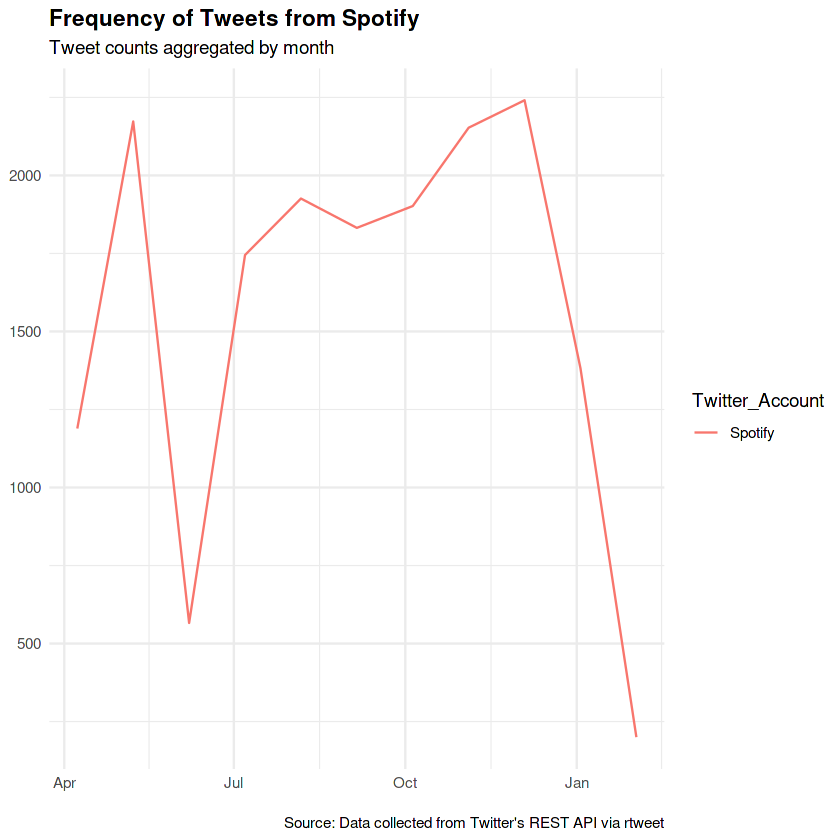

In [94]:
colnames(working_tweets)[colnames(working_tweets)=="screen_name"] <- "Twitter_Account"
ts_plot(dplyr::group_by(working_tweets, Twitter_Account), "month") +
  ggplot2::theme_minimal() +
  ggplot2::theme(plot.title = ggplot2::element_text(face = "bold")) +
  ggplot2::labs(
    x = NULL, y = NULL,
    title = "Frequency of Tweets from Spotify",
    subtitle = "Tweet counts aggregated by month",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet"
  )

(warnings=-1)

4.2 Engagement Type

In [95]:
pie_type_df <- data.frame(
  category = c("Organic", "Retweets", "Replies"),
  count = c(nrow(working_tweets_organic), nrow(working_retweets), nrow(working_replies))
)
pie_type_df

category,count
<chr>,<int>
Organic,6233
Retweets,2954
Replies,8122


In [96]:
pie_type_df <- list(
  category = c("Organic", "Retweets", "Replies"),
  count = c(nrow(working_tweets_organic), nrow(working_retweets), nrow(working_replies)))
as.data.frame(pie_type_df)

category,count
<chr>,<int>
Organic,6233
Retweets,2954
Replies,8122


In [97]:
class(pie_type_df)

[1] "list"

In [98]:
save(pie_type_df,file="pie_type_df.Rdata")

4.3 Source

In [101]:
#ORIGIN Of Where Tweets Came From

Spotify_app <- working_tweets %>% 
  select(source) %>% 
  group_by(source) %>%
  summarize(count=n())
#Spotify_app <- subset(Spotify_app, count > 11)

pie_source_df <- data.frame(
  category=Spotify_app$source,
  count=Spotify_app$count
)

pie_source_df

category,count
<chr>,<int>
Arrow.,7
Lithium Tech.,3421
TweetDeck,363
Twitter for iPhone,2510
Twitter Media Studio,1688
Twitter Web App,9310
Twitter Web Client,10


In [102]:
save(pie_source_df,file="pie_source_df.Rdata")

4.4 Most Common Hashtags

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”


Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


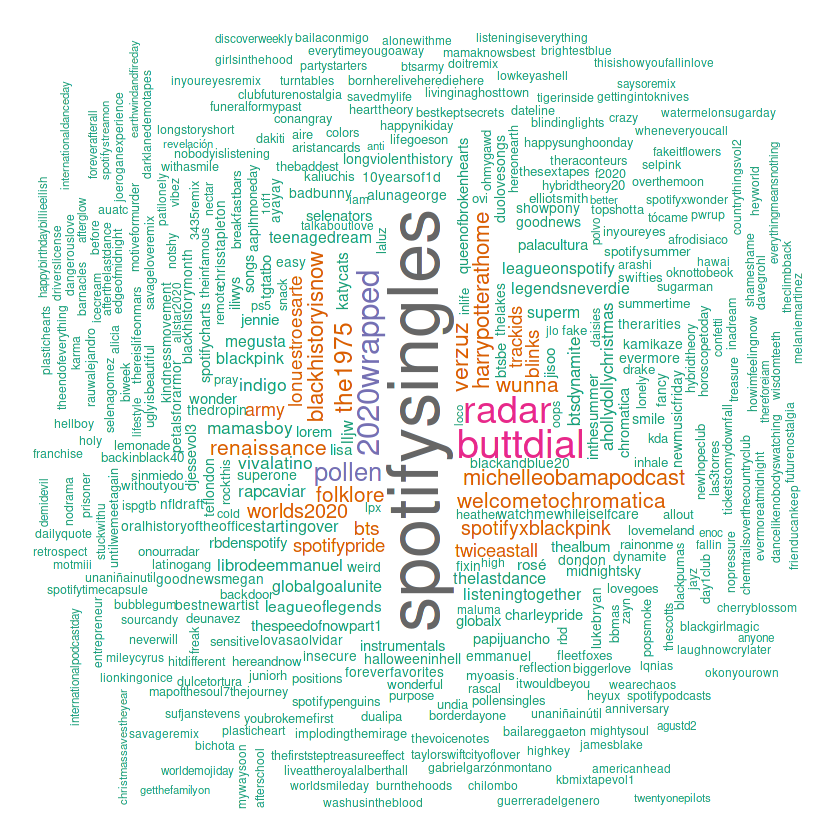

In [104]:
working_tweets_organic$hashtags <- as.character(working_tweets_organic$hashtags)
working_tweets_organic$hashtags <- gsub("c\\(", "", working_tweets_organic$hashtags)
set.seed(1234)
wordcloud(working_tweets_organic$hashtags, min.freq=3, scale=c(3.5, .5), random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

4.5 Retweeters

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”


Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


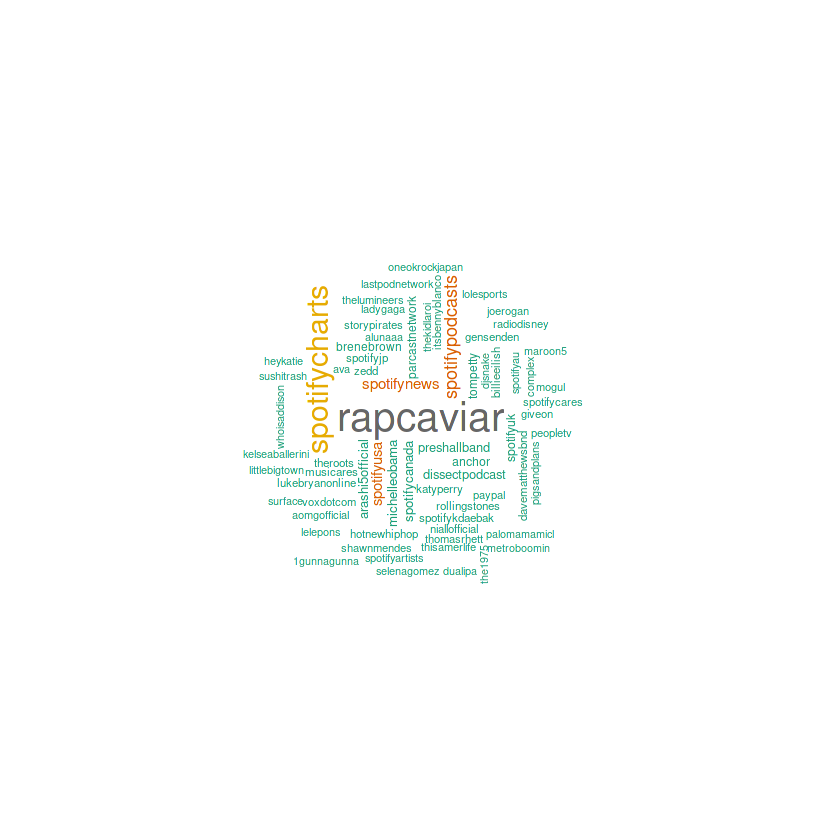

In [105]:
#Shows who retweeted the most

set.seed(1234)
wordcloud(working_retweets$retweet_screen_name, min.freq=5, scale=c(2, .5), random.order=FALSE, rot.per=0.25, 
          colors=brewer.pal(8, "Dark2"))

In [106]:
save(spotify_today,file="spotify_today.Rdata")

,"reply_to_user_id != ""NA""",n
,<lgl>,<int>
1,TRUE,22884
2,NA,181740


[1] "Twitter response rate  = 17.23 %"

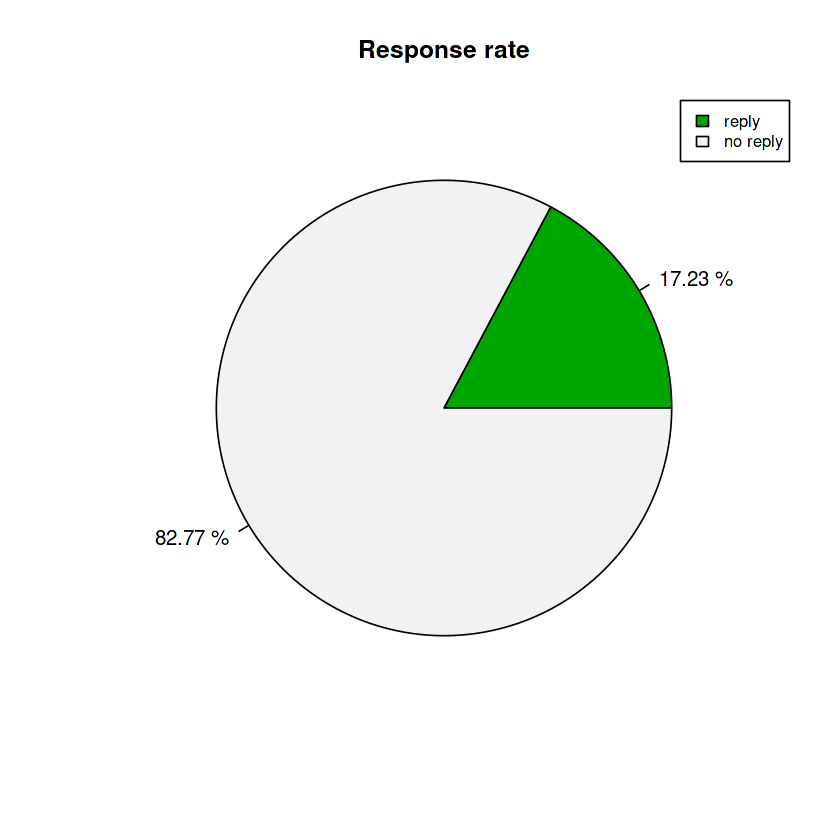

In [110]:
spotify_todaySentimentAnalysis<-spotify_today%>%count(reply_to_user_id != "NA")
spotify_todaySentimentAnalysis
spotify_todayState<-c("reply","no reply")
spotify_todayTotal_number<-c(33526,161030)
spotify_todaypercentage<-paste(round(100 * spotify_todayTotal_number / sum(spotify_todayTotal_number),2),"%")
pie(spotify_todayTotal_number, labels=spotify_todaypercentage, main="Response rate", col=terrain.colors(length(spotify_todayTotal_number)))
legend("topright",spotify_todayState, cex=0.8, fill=terrain.colors(length(spotify_todayTotal_number)))
paste("Twitter response rate  =",round(100 * 33526 / sum(spotify_todayTotal_number),2),"%")

,"reply_to_user_id != ""NA""",n
,<lgl>,<int>
1,TRUE,8133
2,NA,9176


[1] "Twitter response rate in the past nine months  = 46.99 %"

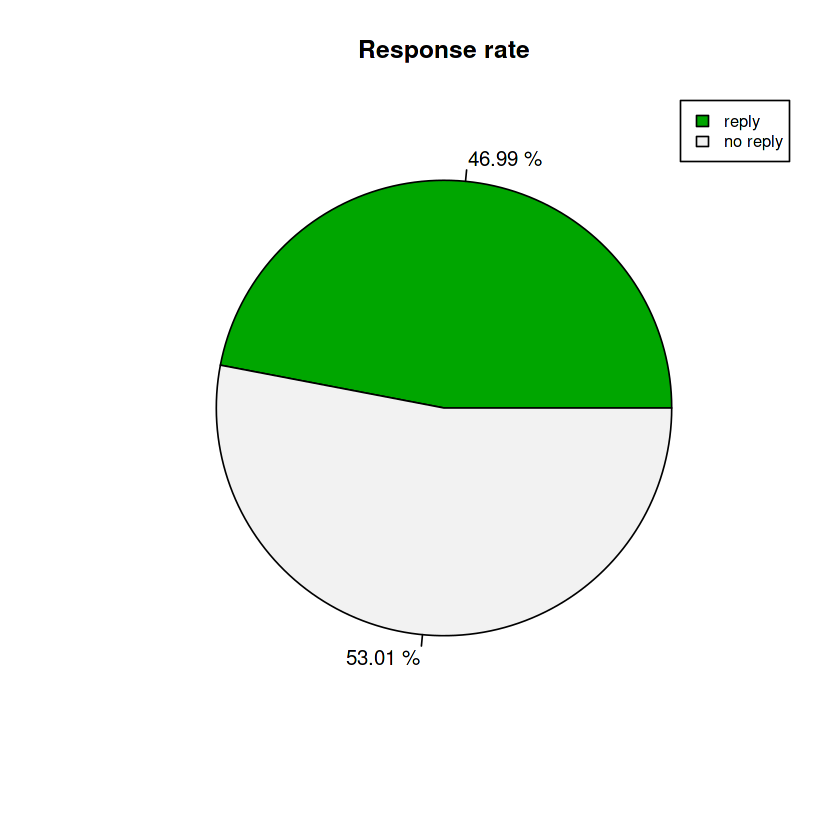

In [108]:
working_tweetsSentimentAnalysis<-working_tweets%>%count(reply_to_user_id != "NA")
working_tweetsSentimentAnalysis
working_tweetsState<-c("reply","no reply")
working_tweetsTotal_number<-c(8133,9176)
working_tweetspercentage<-paste(round(100 * working_tweetsTotal_number / sum(working_tweetsTotal_number),2),"%")
pie(working_tweetsTotal_number, labels=working_tweetspercentage, main="Response rate", col=terrain.colors(length(working_tweetsTotal_number)))
legend("topright",working_tweetsState, cex=0.8, fill=terrain.colors(length(working_tweetsTotal_number)))
paste("Twitter response rate in the past nine months  =",round(100 * 8133 / sum(working_tweetsTotal_number),2),"%")

In [0]:
save(working_tweets,file="working_tweets.Rdata")